In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, cos, pi

N, M = 8, 8

# Transform image into DCT

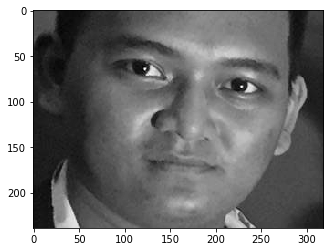

In [36]:
ganteng = cv2.imread('ganteng.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(ganteng, cmap='gray')

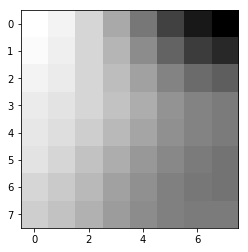

In [18]:
macroblocks = ganteng[128:128+N, 128:128+M]
plt.imshow(macroblocks, cmap='gray')

In [19]:
np.float32(macroblocks)

array([[143., 140., 133., 122., 110.,  97.,  87.,  81.],
       [142., 139., 133., 125., 115., 105.,  96.,  91.],
       [140., 138., 133., 127., 120., 113., 107., 104.],
       [138., 136., 133., 128., 123., 117., 113., 111.],
       [137., 135., 131., 126., 121., 116., 113., 111.],
       [136., 133., 128., 123., 118., 114., 111., 109.],
       [133., 130., 126., 120., 116., 112., 110., 109.],
       [131., 128., 124., 119., 115., 112., 111., 111.]], dtype=float32)

In [20]:
shifted = (np.float32(macroblocks) - 128)
shifted

array([[ 15.,  12.,   5.,  -6., -18., -31., -41., -47.],
       [ 14.,  11.,   5.,  -3., -13., -23., -32., -37.],
       [ 12.,  10.,   5.,  -1.,  -8., -15., -21., -24.],
       [ 10.,   8.,   5.,   0.,  -5., -11., -15., -17.],
       [  9.,   7.,   3.,  -2.,  -7., -12., -15., -17.],
       [  8.,   5.,   0.,  -5., -10., -14., -17., -19.],
       [  5.,   2.,  -2.,  -8., -12., -16., -18., -19.],
       [  3.,   0.,  -4.,  -9., -13., -16., -17., -17.]], dtype=float32)

In [21]:
dct = [[0 for _ in range(M)] for _ in range(N)]
for i in range(N):
    for j in range(M):
        for k in range(N):
            for l in range(M):
                k_cos = cos(pi * (2 * k + 1) * i / 2.0 / N)
                l_cos = cos(pi * (2 * l + 1) * j / 2.0 / M)
                dct[i][j] += shifted[k][l] * k_cos * l_cos
        dct[i][j] *= (sqrt(1.0 / N) if (i == 0) else sqrt(2.0 / N))
        dct[i][j] *= (sqrt(1.0 / M) if (j == 0) else sqrt(2.0 / M))
[[round(dct[i][j]) for j in range(M)] for i in range(N)]

[[-60.0, 98.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0],
 [-7.0, 35.0, -8.0, -0.0, -0.0, -0.0, -0.0, -0.0],
 [-24.0, 16.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0],
 [-8.0, 10.0, -1.0, 0.0, -0.0, 0.0, -0.0, 0.0],
 [-0.0, -0.0, -0.0, -1.0, 0.0, -0.0, -0.0, 0.0],
 [-0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 1.0],
 [0.0, -0.0, 1.0, 0.0, -0.0, -0.0, -0.0, -0.0],
 [-0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0]]

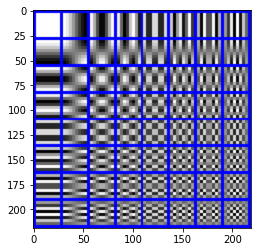

In [3]:
dct_hint = cv2.imread('Dctjpeg.png')
plt.imshow(dct_hint)

# Transform DCT back to Image

In [22]:
new_shifted = [[0 for _ in range(M)] for _ in range(N)]
for i in range(N):
    for j in range(M):
        for k in range(N):
            for l in range(M):
                k_cos = cos(pi * (2 * i + 1) * k / 2.0 / N)
                l_cos = cos(pi * (2 * j + 1) * l / 2.0 / M)
                k_alpha = sqrt(1.0 / N) if (k == 0) else sqrt(2.0 / N)
                l_alpha = sqrt(1.0 / M) if (l == 0) else sqrt(2.0 / M)
                new_shifted[i][j] += dct[k][l] * k_cos * l_cos * k_alpha * l_alpha
[[round(new_shifted[i][j]) for j in range(M)] for i in range(N)]

[[15.0, 12.0, 5.0, -6.0, -18.0, -31.0, -41.0, -47.0],
 [14.0, 11.0, 5.0, -3.0, -13.0, -23.0, -32.0, -37.0],
 [12.0, 10.0, 5.0, -1.0, -8.0, -15.0, -21.0, -24.0],
 [10.0, 8.0, 5.0, 0.0, -5.0, -11.0, -15.0, -17.0],
 [9.0, 7.0, 3.0, -2.0, -7.0, -12.0, -15.0, -17.0],
 [8.0, 5.0, 0.0, -5.0, -10.0, -14.0, -17.0, -19.0],
 [5.0, 2.0, -2.0, -8.0, -12.0, -16.0, -18.0, -19.0],
 [3.0, 0.0, -4.0, -9.0, -13.0, -16.0, -17.0, -17.0]]

In [23]:
new_pixels = np.uint8(np.float32(new_shifted) + 128)
new_pixels

array([[143, 140, 133, 122, 110,  97,  87,  81],
       [142, 139, 133, 125, 115, 105,  96,  91],
       [140, 138, 133, 127, 120, 113, 107, 104],
       [138, 136, 133, 128, 123, 117, 113, 111],
       [137, 135, 131, 126, 121, 116, 113, 111],
       [136, 133, 128, 123, 118, 114, 111, 109],
       [133, 130, 126, 120, 116, 112, 110, 109],
       [131, 128, 124, 119, 115, 112, 111, 111]], dtype=uint8)

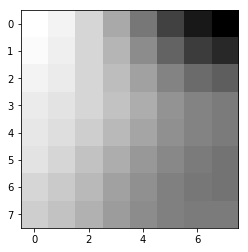

In [24]:
plt.imshow(new_pixels, cmap='gray')

# Quantize the DCT

In [4]:
jpeg_q = [
    [16, 11, 10, 16, 24, 40, 51, 61],
    [12, 12, 14, 19, 26, 58, 60, 55],
    [14, 13, 16, 24, 40, 57, 69, 56],
    [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77],
    [24, 35, 55, 64, 81, 104, 113, 92],
    [49, 64, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103, 99]
]

In [25]:
'''
test_dct = [
    [0, 10, 0, 0, 0, 0, 0, 0],
    [-10, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
]
'''
test_dct = dct

In [26]:
divided = np.float32(test_dct) / np.float32(jpeg_q)
rounded = np.int8([[int(round(divided[i][j])) for j in range(M)] for i in range(N)])
rounded

array([[-4,  9,  0,  0,  0,  0,  0,  0],
       [-1,  3, -1,  0,  0,  0,  0,  0],
       [-2,  1,  0,  0,  0,  0,  0,  0],
       [-1,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0]], dtype=int8)

In [27]:
compressed_dct = rounded * jpeg_q
compressed_shifted = [[0 for _ in range(M)] for _ in range(N)]
for i in range(N):
    for j in range(M):
        for k in range(N):
            for l in range(M):
                k_cos = cos(pi * (2 * i + 1) * k / 2.0 / N)
                l_cos = cos(pi * (2 * j + 1) * l / 2.0 / M)
                k_alpha = sqrt(1.0 / N) if (k == 0) else sqrt(2.0 / N)
                l_alpha = sqrt(1.0 / M) if (l == 0) else sqrt(2.0 / M)
                compressed_shifted[i][j] += compressed_dct[k][l] * k_cos * l_cos * k_alpha * l_alpha
compressed_pixels = np.uint8(np.float32(compressed_shifted) + 128)
compressed_pixels

array([[140, 137, 130, 120, 108,  94,  82,  75],
       [139, 136, 132, 124, 114, 103,  94,  89],
       [138, 136, 133, 128, 121, 114, 108, 104],
       [138, 136, 133, 128, 123, 118, 113, 111],
       [139, 136, 131, 125, 120, 114, 111, 109],
       [137, 134, 128, 121, 115, 111, 108, 107],
       [133, 130, 124, 119, 114, 111, 110, 110],
       [130, 127, 122, 117, 114, 113, 114, 114]], dtype=uint8)

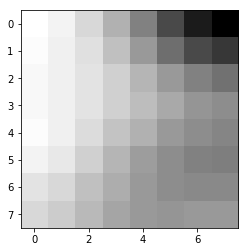

In [28]:
plt.imshow(compressed_pixels, cmap='gray')